In [75]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [95]:
#data handling/modeling
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
import scipy.stats as stats
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib
from sklearn.cluster import KMeans
import seaborn as sns; sns.set()
import csv
import six
from random import seed
from sklearn.externals.six import StringIO
from random import randrange
from csv import reader
from math import sqrt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from imblearn.combine import SMOTEENN
from collections import Counter
from sklearn.feature_selection import RFECV
from sklearn.tree import export_graphviz
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from collections import Counter
from IPython.display import Image
import pydotplus
import folium
from folium.plugins import HeatMap


#svm
from sklearn import datasets
from sklearn import svm 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import auc, confusion_matrix, roc_curve

#geotools
import geopy
import geocoder
import geopandas as gpd
from geopandas.tools import geocode
from geopy.geocoders import Nominatim


ModuleNotFoundError: No module named 'geopy'

In [3]:
data = pd.read_csv("MVC.csv")
print(data.dtypes)
print(data.shape)

CRASH DATE                        object
CRASH TIME                        object
BOROUGH                           object
ZIP CODE                         float64
LATITUDE                         float64
LONGITUDE                        float64
LOCATION                          object
ON STREET NAME                    object
CROSS STREET NAME                 object
OFF STREET NAME                   object
NUMBER OF PERSONS INJURED        float64
NUMBER OF PERSONS KILLED         float64
NUMBER OF PEDESTRIANS INJURED      int64
NUMBER OF PEDESTRIANS KILLED       int64
NUMBER OF CYCLIST INJURED          int64
NUMBER OF CYCLIST KILLED           int64
NUMBER OF MOTORIST INJURED         int64
NUMBER OF MOTORIST KILLED          int64
CONTRIBUTING FACTOR VEHICLE 1     object
CONTRIBUTING FACTOR VEHICLE 2     object
CONTRIBUTING FACTOR VEHICLE 3     object
CONTRIBUTING FACTOR VEHICLE 4     object
CONTRIBUTING FACTOR VEHICLE 5     object
COLLISION_ID                       int64
VEHICLE TYPE COD

In [4]:
def cyclist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def motorist_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def pedestrian_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def rush_to_bin(x):
    if 7.5<x<9 or 16.5<x<19:
        return 1
    else:
        return 0
def persons_to_bin(x):
    if x == 0:
        return 0
    else:
        return 1
def persons_to_class(x):
    if x[2] == 1:
        return 1
    if x[3] == 1:
        return 2
    if x[4] == 1:
        return 3
    else:
        return 0
def multiple_personas(x):
    return x[2]+x[3]+x[4]

In [5]:
data["CYCLIST_AFFECTED"] = data["NUMBER OF CYCLIST INJURED"]+data["NUMBER OF CYCLIST KILLED"]
data["MOTORIST_AFFECTED"] = data["NUMBER OF MOTORIST INJURED"]+data["NUMBER OF MOTORIST KILLED"]
data["PEDESTRIAN_AFFECTED"] = data["NUMBER OF PEDESTRIANS INJURED"]+data["NUMBER OF PEDESTRIANS KILLED"]
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']
data['PERSONS_TF']= data['PERSONS_AFFECTED'].apply(persons_to_bin)
data['MOTORIST_TF']= data["MOTORIST_AFFECTED"].apply(motorist_to_bin)
data['CYCLIST_TF']= data["CYCLIST_AFFECTED"].apply(cyclist_to_bin)
data['PEDESTRIAN_TF']= data["PEDESTRIAN_AFFECTED"].apply(pedestrian_to_bin)
data['RUSH_TF'] = data['NUMTIME'].apply(rush_to_bin)
data['PERSONS_AFFECTED'] = data['NUMBER OF PERSONS KILLED'] + data['NUMBER OF PERSONS INJURED']



In [6]:
value_counts = data["CONTRIBUTING FACTOR VEHICLE 1"].value_counts(ascending=True)
remove = value_counts[value_counts <= 20].index
data = data[~data['CONTRIBUTING FACTOR VEHICLE 1'].isin(remove)]

data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Driver Inattention/Distraction','Following Too Closely','Failure to Yield Right-of-Way','Backing Unsafely','Passing Too Closely','Unsafe Lane Changing','Passing or Lane Usage Improper','Turning Improperly','Traffic Control Disregarded','Driver Inexperience','Reaction to Uninvolved Vehicle','Unsafe Speed','Fatigued/Drowsy','Alcohol Involvement','Lost Consciousness','Aggressive Driving/Road Rage','Fell Asleep','Illnes','Drugs (illegal)','Drugs (Illegal)','Texting','Outside Car Distraction','Passenger Distraction','Prescription Medication','Failure to Keep Right','Illness','Other Electronic Device','Cell Phone (hand-Held)','Cell Phone (hands-free)','Eating or Drinking','Pedestrian/Bicyclist/Other Pedestrian Error/Confusion','Physical Disability','Reaction to Other Uninvolved Vehicle','Using On Board Navigation Device','Tinted Windows','Vehicle Vandalism','Cell Phone (hand-held)'],'Human')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Other Vehicular','Oversized Vehicle','Brakes Defective','Steering Failure','Tire Failure/Inadequate','Driverless/Runaway Vehicle','Accelerator Defective','Other Lighting Defects','Tow Hitch Defective','Headlights Defective','Windshield Inadequate'],'Vehicular')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['Pavement Slippery','View Obstructed/Limited','Glare','Obstruction/Debris','Pavement Defective','Animals Action','Lane Marking Improper/Inadequate','Traffic Control Device Improper/Non-Working','Shoulders Defective/Improper'],'Environmental')
data['CONTRIBUTING FACTOR VEHICLE 1'] = data['CONTRIBUTING FACTOR VEHICLE 1'].replace(['80'],'Unspecified')
print(print(data['CONTRIBUTING FACTOR VEHICLE 1'].value_counts()))



Human            704049
Unspecified      268015
Vehicular         48156
Environmental     24940
Name: CONTRIBUTING FACTOR VEHICLE 1, dtype: int64
None


In [7]:
factor_dummy = data['CONTRIBUTING FACTOR VEHICLE 1'].str.get_dummies()
data = pd.concat([data,factor_dummy],axis=1)
borough_dummy = data.BOROUGH.str.get_dummies()
data = pd.concat([data,borough_dummy],axis=1)

In [12]:
data.drop(data.columns[1:2],axis=1,inplace=True)
print(data.dtypes)

NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
dtype: object


In [13]:
data['EDGE_CASES'] = data.apply(multiple_personas,axis = 1)
data.EDGE_CASES.value_counts()

0.0    840770
1.0    206611
2.0      1160
3.0         6
Name: EDGE_CASES, dtype: int64

In [14]:
index = data[(data['EDGE_CASES'] != 1)].index
data.drop(index,inplace=True)
print(data.shape)
print(data.dtypes)

(206611, 16)
NUMTIME          float64
PERSONS_TF         int64
MOTORIST_TF        int64
CYCLIST_TF         int64
PEDESTRIAN_TF      int64
RUSH_TF            int64
Environmental      int64
Human              int64
Unspecified        int64
Vehicular          int64
BRONX              int64
BROOKLYN           int64
MANHATTAN          int64
QUEENS             int64
STATEN ISLAND      int64
EDGE_CASES       float64
dtype: object


In [15]:
data['PERSONS_CLASS'] = data.apply(persons_to_class,axis=1)
data.PERSONS_CLASS.value_counts()

1    136074
3     48814
2     21723
Name: PERSONS_CLASS, dtype: int64

In [16]:
pred = list(zip(data['NUMTIME'],data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp = data['PERSONS_CLASS']
resp.value_counts()

1    136074
3     48814
2     21723
Name: PERSONS_CLASS, dtype: int64

In [17]:
sm = SMOTEENN(random_state=42)
X_res, y_res = sm.fit_resample(pred,resp)
print('Resampled dataset shape %s' % Counter(y_res))

Resampled dataset shape Counter({1: 25067, 2: 23576, 3: 20142})


In [23]:
X_feat = X_res
y = y_res
X_feat_train,X_feat_test, y_feat_train,y_feat_test = train_test_split(X_feat,y,test_size=0.2)

dtc = RandomForestClassifier()
grid={'max_depth':[1,2,3,4,5,10,20,30],
        'criterion':['gini','entropy'],
        'min_samples_leaf':[10,20,30,50,60]}

gs = GridSearchCV(dtc,grid,cv=3,verbose=True,return_train_score=False,n_jobs=-1)
gs.fit(X_feat,y)

scores = pd.DataFrame(gs.cv_results_).filter(regex='param_+|mean_test_score'
                                            ).sort_values('mean_test_score',
                                                          ascending=False).reset_index().drop(['index'],axis=1)
scores.head(10)

Fitting 3 folds for each of 80 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   34.9s
[Parallel(n_jobs=-1)]: Done 176 tasks      | elapsed:  3.8min
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:  5.2min finished


,param_criterion,param_max_depth,param_min_samples_leaf,mean_test_score
0,gini,30,10,0.852642
1,gini,20,10,0.852642
2,entropy,30,10,0.851348
3,entropy,20,10,0.843716
4,gini,20,20,0.796830
5,gini,30,20,0.795173
6,entropy,30,20,0.793341
7,entropy,20,20,0.790783
8,gini,20,30,0.776812
9,gini,30,30,0.773555


In [114]:
X_feat = X_res
y = y_res
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t = RandomForestClassifier(criterion='gini',max_depth=30,min_samples_leaf=10)

t.fit(X_train,y_train)
y_test_pred = t.predict(X_test)


print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Classification Report:
               precision    recall  f1-score   support

           1       0.84      0.91      0.87      4864
           2       0.87      0.83      0.85      4846
           3       0.90      0.85      0.88      4047

    accuracy                           0.87     13757
   macro avg       0.87      0.87      0.87     13757
weighted avg       0.87      0.87      0.87     13757

Null accuracy on the test set:  1.940612052046231
Sensitivity/Recall (TPR):  0.8662499091371665
Precision (PPV):  0.8662499091371665
Accuracy: 0.8662499091371665


array([[4433,  276,  155],
       [ 591, 4028,  227],
       [ 279,  312, 3456]])

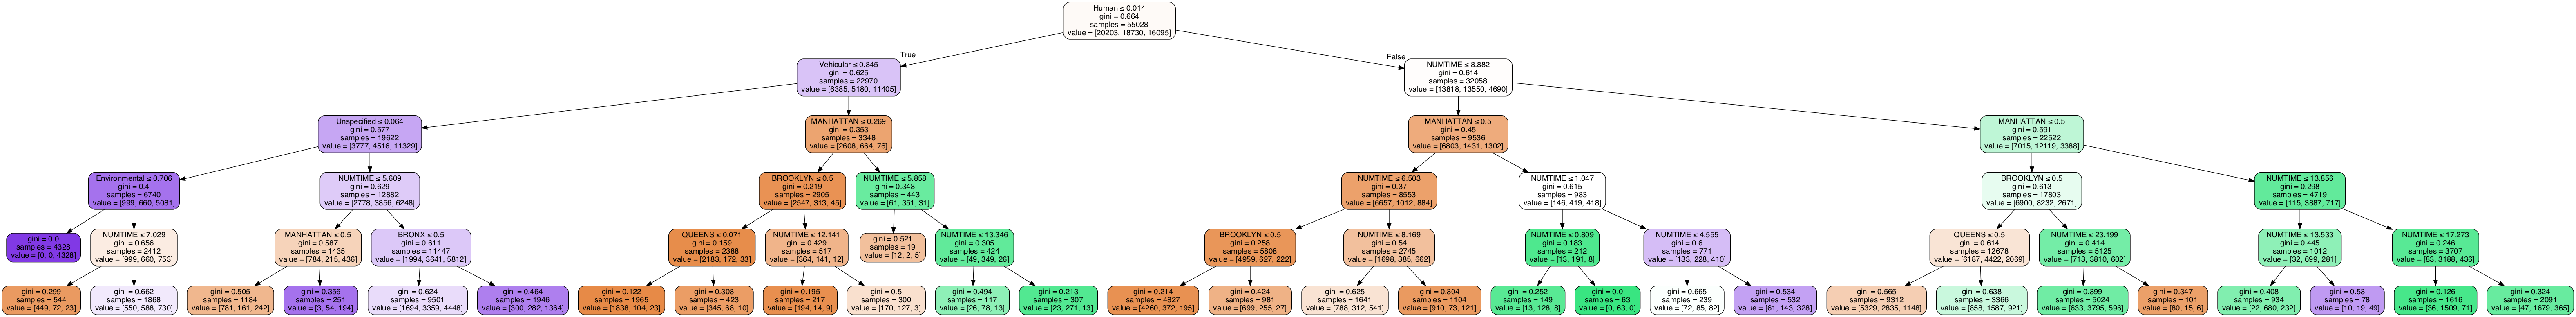

In [122]:
t = DecisionTreeClassifier(max_depth=5,min_samples_leaf=10)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=['NUMTIME','MANHATTAN','QUEENS','BRONX','STATEN ISLAND','BROOKLYN','Human','Environmental','Vehicular','Unspecified'],
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [80]:
importance = t.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))

Feature: 0, Score: 0.51481
Feature: 1, Score: 0.11023
Feature: 2, Score: 0.01705
Feature: 3, Score: 0.02651
Feature: 4, Score: 0.01213
Feature: 5, Score: 0.04958
Feature: 6, Score: 0.12427
Feature: 7, Score: 0.02486
Feature: 8, Score: 0.08111
Feature: 9, Score: 0.03945


[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Confusion Matrix')]

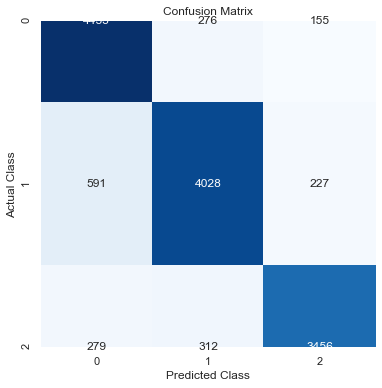

In [115]:
test_cf = pd.DataFrame(confusion_matrix(y_test,t.predict(X_test)))

fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,fmt='d',cmap='Blues',cbar=False)
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Confusion Matrix')

[Text(30.5, 0.5, 'Actual Class'),
 Text(0.5, 30.5, 'Predicted Class'),
 Text(0.5, 1, 'Normalized Confusion Matrix')]

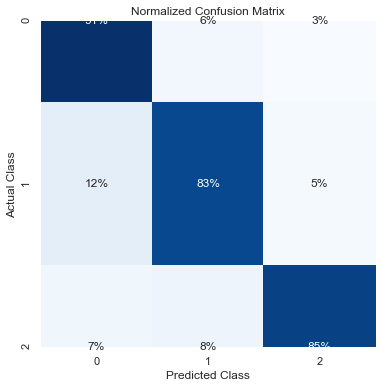

In [116]:


test_cf = confusion_matrix(y_test,t.predict(X_test))
test_cf = test_cf.astype('float') / test_cf.sum(axis=1)[:, np.newaxis]
test_cf = pd.DataFrame((test_cf))
                           
fig, ax = plt.subplots(figsize=(6,6))
ax = sns.heatmap(test_cf,annot=True,cmap='Blues',cbar=False,fmt='.0%')
ax.set(xlabel='Predicted Class',ylabel='Actual Class',title='Normalized Confusion Matrix')

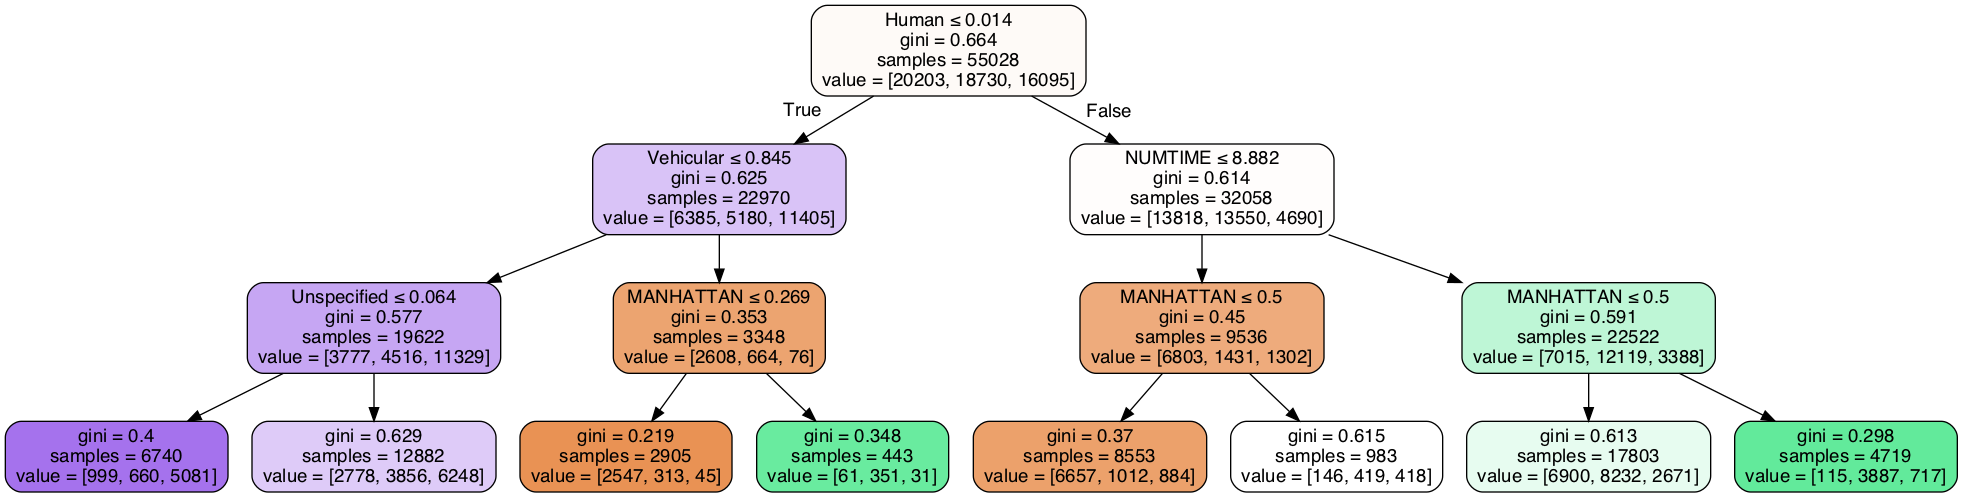

In [117]:
t = DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)

t.fit(X_train,y_train)

dot_data = StringIO()  
export_graphviz(t, out_file=dot_data,  
                    feature_names=['NUMTIME','MANHATTAN','QUEENS','BRONX','STATEN ISLAND','BROOKLYN','Human','Environmental','Vehicular','Unspecified'],
                    filled=True, rounded=True,  
                    special_characters=True)  
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [97]:
fn=pred
cn=resp
t = RandomForestClassifier(n_estimators=100,criterion='gini',max_depth=30,min_samples_leaf=10)
i_tree = 0
dotfile = six.StringIO()
for tree_in_forest in t.estimators_:
    if (i_tree <1):        
        tree.export_graphviz(tree_in_forest, out_file=dotfile)
        pydotplus.graph_from_dot_data(dotfile.getvalue()).write_png('dtree'+ str(i_tree) +'.png')
        i_tree = i_tree + 1
export_graphviz(tree_in_forest,
                feature_names=X.columns,
                filled=True,
                rounded=True)
os.system('dot -Tpng tree.dot -o tree.png')

AttributeError: 'RandomForestClassifier' object has no attribute 'estimators_'

In [36]:
pred=X_res
resp=y_res
logreg = LogisticRegression(C=1e9)
logreg.fit(pred, resp)
end = logreg.predict(pred)
print("The slope is: ",logreg.coef_)
print("The y-intercept is:",logreg.intercept_)
print("The r^2 is:",metrics.r2_score(resp,end))
print("The MSE is:",metrics.mean_squared_error(resp, end))

The slope is:  [[-0.07049431 -2.97844538 -1.02366211 -0.99648065 -0.05224419 -1.38487336
   1.90852985  1.72871529  3.37024318  1.23254136]
 [ 0.0555161   1.45096771  0.11000301 -0.37663994 -1.3208323   0.7399341
   1.80612718  1.21754275  1.37048796  1.34690401]
 [ 0.01497821  1.52747767  0.9136591   1.37312059  1.37307649  0.64493926
  -3.71465703 -2.94625804 -4.74073115 -2.57944537]]
The y-intercept is: [ 0.25979062 -2.44179432  2.18200371]
The r^2 is: 0.11606758147698759
The MSE is: 0.5764338155121029


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


ValueError: x and y must have same first dimension, but have shapes (206611,) and (68785,)

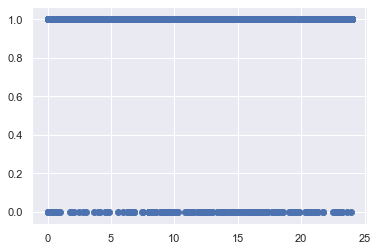

In [102]:
plt.rcParams['agg.path.chunksize'] = 10000
sns.mpl.pyplot.scatter(data.NUMTIME, data.PERSONS_TF)
outcome_probs = logreg.predict_proba(pred)[:, 1]
sns.mpl.pyplot.plot(data.NUMTIME, outcome_probs, color='red')
sns.mpl.pyplot.plot(data.NUMTIME,np.ones(outcome_probs.shape)*.5,'k--')

In [24]:
pred2 = list(zip(data['MANHATTAN'],data['QUEENS'],data['BRONX'],data['STATEN ISLAND'],data['BROOKLYN'],data['Human'],data['Environmental'],data['Vehicular'],data['Unspecified']))
resp2 = data['RUSH_TF']
resp2.value_counts()

0    159421
1     47190
Name: RUSH_TF, dtype: int64

In [25]:
sm = SMOTEENN(random_state=42)
X_res2, y_res2 = sm.fit_resample(pred2,resp2)
print('Resampled dataset shape %s' % Counter(y_res2))

Resampled dataset shape Counter({0: 18513})


In [26]:
X_feat = X_res2
y = y_res2
X_train, X_test, y_train, y_test = train_test_split(X_feat, y, test_size=0.2)


t2 = RandomForestClassifier(criterion='entropy',max_depth=5,min_samples_leaf=50)

t2.fit(X_train,y_train)
y_test_pred = t2.predict(X_test)


print("Classification Report:\n", metrics.classification_report(y_test,y_test_pred))
print("Null accuracy on the test set: ",y_test.mean())
print("Sensitivity/Recall (TPR): ",metrics.recall_score(y_test,y_test_pred,average='micro'))
print("Precision (PPV): ", metrics.precision_score(y_test,y_test_pred,average='micro'))
print("Accuracy:",metrics.accuracy_score(y_test, y_test_pred))
cm = metrics.confusion_matrix(y_test, y_test_pred)
cm

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      3703

    accuracy                           1.00      3703
   macro avg       1.00      1.00      1.00      3703
weighted avg       1.00      1.00      1.00      3703

Null accuracy on the test set:  0.0
Sensitivity/Recall (TPR):  1.0
Precision (PPV):  1.0
Accuracy: 1.0


array([[3703]])

In [77]:
def generateBaseMap(default_location=[40.693943, -73.985880], default_zoom_start=12):
    base_map = folium.Map(location=[40.738, -73.98],
                        zoom_start=13,
                        tiles="CartoDB dark_matter")
    return base_map

In [78]:
base_map = generateBaseMap()
HeatMap(data=data[['LONGITUDE','LATITUDE']].groupby(['LATITUDE','LONGITUDE']).sum().reset_index().values.tolist(),radius = 8).add_to(base_map)
base_map

KeyError: "None of [Index(['LONGITUDE', 'LATITUDE'], dtype='object')] are in the [columns]"